# Practica 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from pandas import Series, DataFrame
from matplotlib import collections as collections
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sb.set_style('whitegrid')
from numpy import median
from numpy import mean

In [2]:
rossman = pd.read_csv('RossmanDataV1.csv',sep=';')
rossman.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,107,6,5/23/15,3918,378,1,0,0,0,d,a,0,0.0,0.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
1,492,3,6/5/2013,8856,901,1,1,0,0,d,a,0,0.0,0.0,0,NaN,NaN,NaN
2,57,1,12/30/13,5940,577,1,0,0,1,a,c,0,0.0,0.0,0,NaN,NaN,NaN
3,260,5,1/2/2015,4311,439,1,0,0,1,a,c,0,0.0,0.0,0,NaN,NaN,NaN
4,932,4,4/4/2013,3294,345,1,0,0,1,d,a,0,0.0,0.0,1,5.0,2013.0,"Feb,May,Aug,Nov"


### 1.	Quitar filas duplicadas

In [3]:
rossman.duplicated().any()  

False

#### No existen duplicados en el dataset

In [4]:
rossman.drop_duplicates(subset=None, inplace=True)  

#### Aplicando la función, el Dataset se mantiene inalterado

In [5]:
rossman.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### 2.	Quitar columnas duplicadas

In [6]:
rossmanSinCR = rossman.T.drop_duplicates().T
rossmanSinCR.shape

(5000, 18)

#### No existen columnas repetidas

### 3. Identificar columnas que tienen valores constantes

In [7]:
def drop_constant_columns(dataframe):
    result = dataframe.copy()
    for column in dataframe.columns:
        if len(dataframe[column].unique()) == 1:
            result = result.drop(column,axis=1)
    return result

In [8]:
rossmanSinCK = drop_constant_columns(rossman)
rossmanSinCK.shape  


(5000, 18)

####  El Datset no tiene valores constantes

### 4.	Identifique el porcentaje de valores faltantes en las columnas

In [9]:
total = rossman.isnull().sum().sort_values(ascending=False)
porcentaje = (rossman.isnull().sum()/rossman.isnull().count()).sort_values(ascending=False)
faltantes = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])
faltantes  

,Total,Porcentaje
PromoInterval,2497,0.4994
Promo2SinceYear,2497,0.4994
Promo2SinceWeek,2497,0.4994
CompetitionOpenSinceYear,1529,0.3058
CompetitionOpenSinceMonth,1529,0.3058
DayOfWeek,0,0.0000
Promo2,0,0.0000
CompetitionDistance,0,0.0000
Assortment,0,0.0000
Store,0,0.0000


### 5.	Analice el caso de los atributos que no serían apropiados para el dataset, por medio de gráficas. Cuáles decidiría usted de transformar o en su caso quitar, con el propósito de mejorar el dataset. Genere las siguientes gráficas:

#### Histogramas

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Customers'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

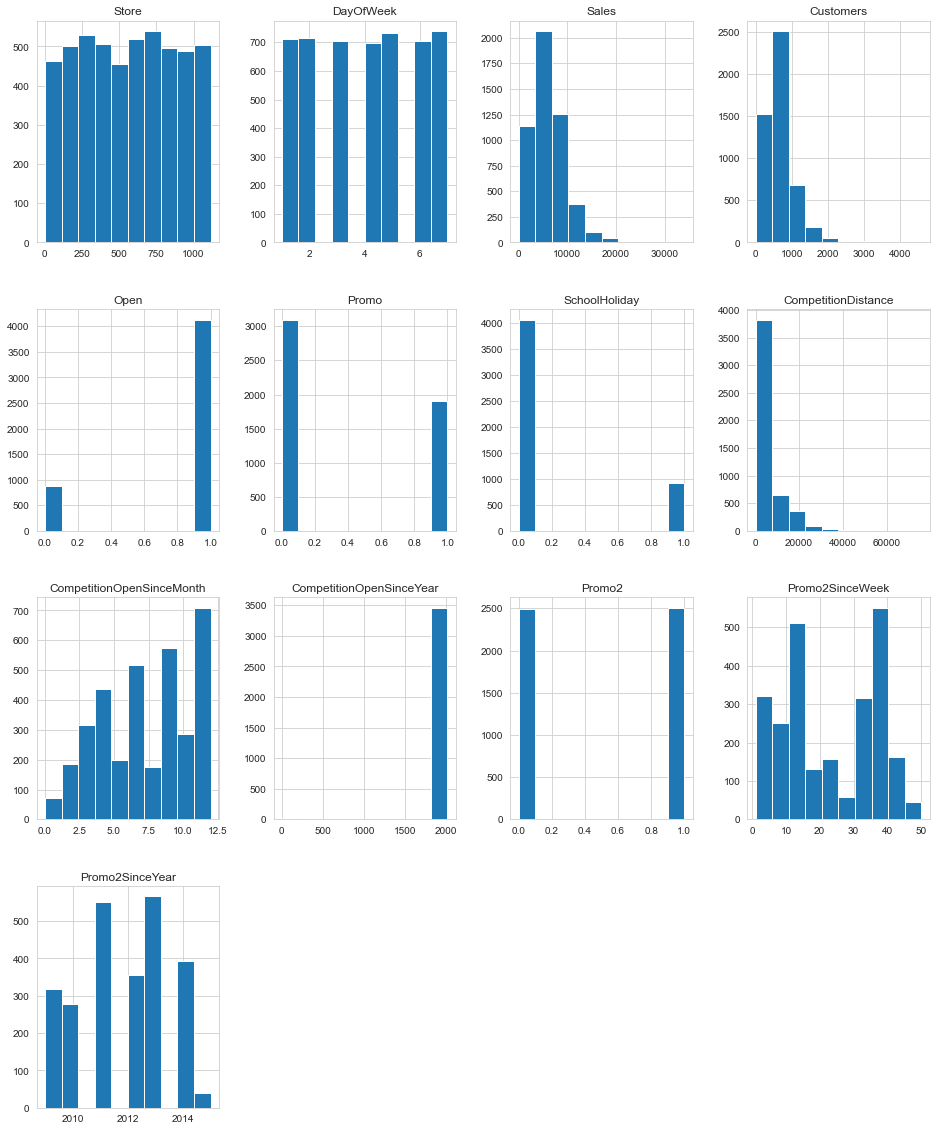

In [10]:
rossman.hist(figsize=(16, 20))

#### El campo Date no se visualiza en los gráficos de histogramas debido a que algunas fechas no tienen el formato correcto. Se debería transformar dicho campo y separarlo por dia, mes y año.
#### Asimismo, los campos Promo2SinceWeek deberían señalar el mes o semana que empieza la promoción 2. De la forma que esta presentada en el DataSet no aporta información relevante en primera instancia.
#### Finalmente, la variable PromoInterval debe ser transformada de modo que se señale el mes en que comienza la Promo2


#### ●  Quartiles

<AxesSubplot:xlabel='Open', ylabel='Sales'>

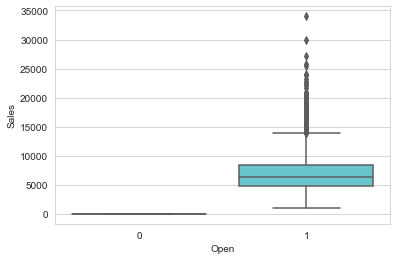

In [11]:
sb.boxplot(x='Open', y='Sales', data=rossman, palette='hls')

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

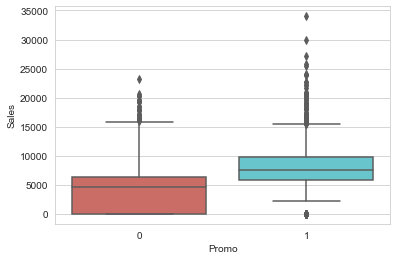

In [12]:
sb.boxplot(x='Promo', y='Sales', data=rossman, palette='hls')

<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

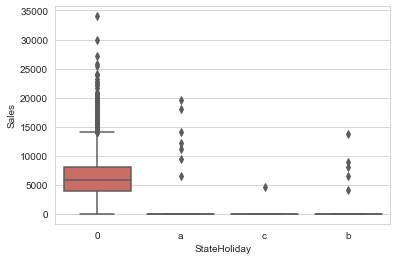

In [13]:
sb.boxplot(x='StateHoliday', y='Sales', data=rossman, palette='hls')

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

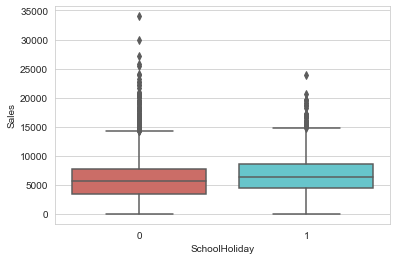

In [14]:
sb.boxplot(x='SchoolHoliday', y='Sales', data=rossman, palette='hls')

<AxesSubplot:xlabel='StoreType', ylabel='Sales'>

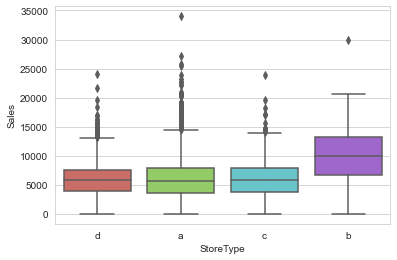

In [15]:
sb.boxplot(x='StoreType', y='Sales', data=rossman, palette='hls')

<AxesSubplot:xlabel='Assortment', ylabel='Sales'>

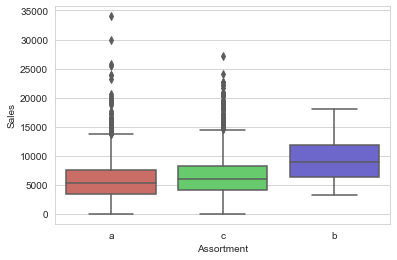

In [16]:
sb.boxplot(x='Assortment', y='Sales', data=rossman, palette='hls')

#### ●	Scatter plots


<AxesSubplot:xlabel='Customers', ylabel='Sales'>

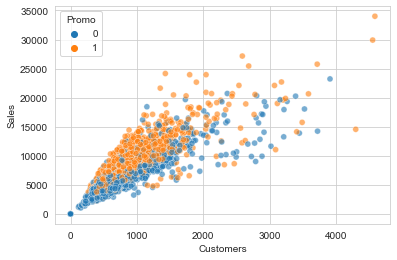

In [17]:
sb.scatterplot(data=rossman, x="Customers", y="Sales", hue="Promo", alpha=.6)

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Sales'>

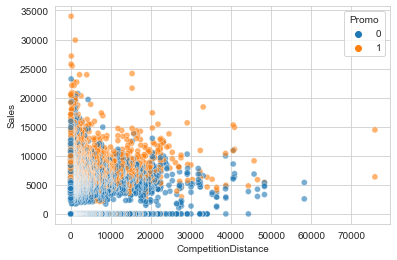

In [18]:
sb.scatterplot(data=rossman, x="CompetitionDistance", y="Sales", hue="Promo", alpha=.6)

<AxesSubplot:xlabel='Customers', ylabel='Sales'>

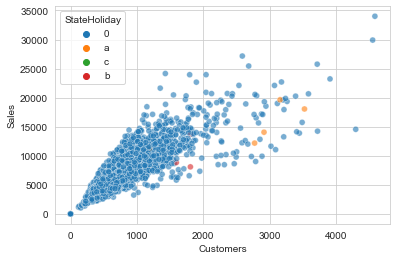

In [19]:
sb.scatterplot(data=rossman, x="Customers", y="Sales", hue="StateHoliday", alpha=.6)

<AxesSubplot:xlabel='Customers', ylabel='Sales'>

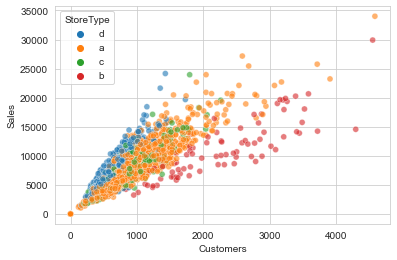

In [20]:
sb.scatterplot(data=rossman, x="Customers", y="Sales", hue="StoreType", alpha=.6)

#### ● Distributions


<AxesSubplot:xlabel='Sales', ylabel='Density'>

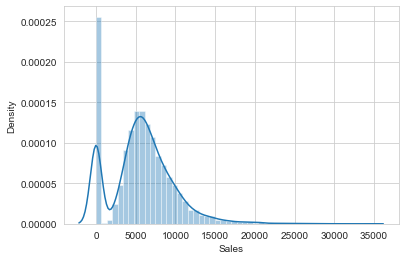

In [21]:
sb.distplot(rossman['Sales'])

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Density'>

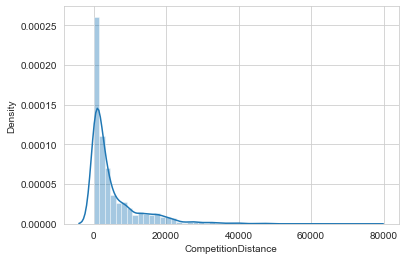

In [22]:
sb.distplot(rossman['CompetitionDistance'])

<AxesSubplot:xlabel='Customers', ylabel='Density'>

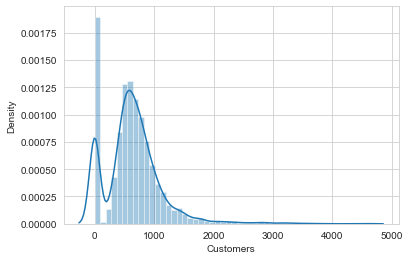

In [23]:
sb.distplot(rossman['Customers'])

#### ● Heatmaps

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Promo'>

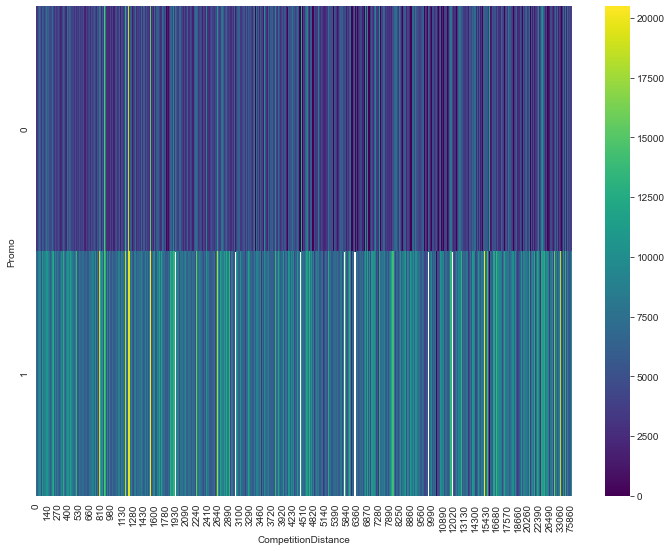

In [24]:
f, ax = plt.subplots(figsize=(12, 9))
rossmanHeatMap=rossman[['Sales','CompetitionDistance','Promo']]

heatmap1_data = pd.pivot_table(rossmanHeatMap, values='Sales', 
                     index=['Promo'], 
                     columns='CompetitionDistance')
sb.heatmap(heatmap1_data, cmap="viridis")


### 6.	Obtenga la matriz de correlación de las variables numéricas.

In [25]:
rossman.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,0.007328,-0.006336,-0.002044,-0.005640,-0.001156,0.023658,-0.000746,0.001561,0.020674,0.006758,0.032085,-0.021478
DayOfWeek,0.007328,1.000000,-0.466284,-0.379915,-0.533832,-0.390240,-0.196871,0.004516,-0.007933,0.011986,-0.004891,-0.008108,0.021078
Sales,-0.006336,-0.466284,1.000000,0.892580,0.674644,0.446468,0.109038,-0.029147,-0.027478,0.011830,-0.106446,0.078716,-0.022570
Customers,-0.002044,-0.379915,0.892580,1.000000,0.605331,0.303503,0.096653,-0.115721,-0.039735,0.013763,-0.167134,0.054363,0.032426
Open,-0.005640,-0.533832,0.674644,0.605331,1.000000,0.295512,0.115792,0.000004,-0.006239,-0.008608,-0.018441,0.009817,-0.011466
Promo,-0.001156,-0.390240,0.446468,0.303503,0.295512,1.000000,0.063994,-0.013633,0.046225,-0.000236,-0.004236,0.002317,0.010611
SchoolHoliday,0.023658,-0.196871,0.109038,0.096653,0.115792,0.063994,1.000000,0.001020,0.029519,-0.044086,-0.022702,0.006464,-0.002074
CompetitionDistance,-0.000746,0.004516,-0.029147,-0.115721,0.000004,-0.013633,0.001020,1.000000,-0.070386,-0.034724,-0.121985,-0.020150,-0.127675
CompetitionOpenSinceMonth,0.001561,-0.007933,-0.027478,-0.039735,-0.006239,0.046225,0.029519,-0.070386,1.000000,0.149134,0.017952,-0.037676,0.045844
CompetitionOpenSinceYear,0.020674,0.011986,0.011830,0.013763,-0.008608,-0.000236,-0.044086,-0.034724,0.149134,1.000000,0.026432,0.060082,-0.033178


(13.5, -0.5)

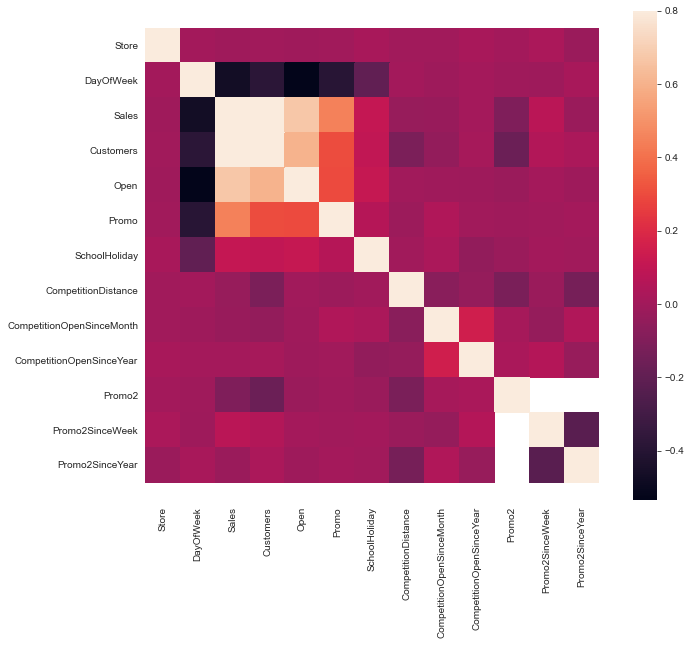

In [26]:
corrmat = rossman.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8, square=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

### 7. Mapear Day of Week con los días en literal.

In [27]:
semanadic = {1: "Lunes",2: "Martes",3: "Miercoles",4: "Jueves",5: "Viernes",6: "Sábado",7: "Domingo",}
rossman['DiaLiteral'] = rossman['DayOfWeek'].map(semanadic)
rossman.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DiaLiteral
0,107,6,5/23/15,3918,378,1,0,0,0,d,a,0,0.0,0.0,1,5.0,2013.0,"Feb,May,Aug,Nov",Sábado
1,492,3,6/5/2013,8856,901,1,1,0,0,d,a,0,0.0,0.0,0,NaN,NaN,NaN,Miercoles
2,57,1,12/30/13,5940,577,1,0,0,1,a,c,0,0.0,0.0,0,NaN,NaN,NaN,Lunes
3,260,5,1/2/2015,4311,439,1,0,0,1,a,c,0,0.0,0.0,0,NaN,NaN,NaN,Viernes
4,932,4,4/4/2013,3294,345,1,0,0,1,d,a,0,0.0,0.0,1,5.0,2013.0,"Feb,May,Aug,Nov",Jueves


### 8.	Obtenga la tabla de relación de frecuencias entre los atributos StoreType y Assortment


In [28]:
pd.crosstab(index=rossman["StoreType"], 
            columns=rossman["Assortment"], margins=True)

Assortment,a,b,c,All
StoreType,,,,
a,1718,0,1026,2744
b,39,48,7,94
c,306,0,337,643
d,587,0,932,1519
All,2650,48,2302,5000


### 9.	Mapear el atributo CompetitionOpenSinceMonth con los meses del año en literal y rellenar los valores faltantes “?” con el mes que tenga la mayor frecuencia.

In [29]:
mesdic = {1:"Enero",2:"Febrero",3:"Marzo",4:"Abril",5:"Mayo",6:"Junio",7:"Julio",8:"Agosto",9:"Septiembre",10:"Octubre",11:"Noviemnbre",12:"Diciembre",}
rossman['CompetenciaDesdeMes'] = rossman['CompetitionOpenSinceMonth'].map(mesdic)
rossman

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DiaLiteral,CompetenciaDesdeMes
0,107,6,5/23/15,3918,378,1,0,0,0,d,a,0,0.0,0.0,1,5.0,2013.0,"Feb,May,Aug,Nov",Sábado,NaN
1,492,3,6/5/2013,8856,901,1,1,0,0,d,a,0,0.0,0.0,0,NaN,NaN,NaN,Miercoles,NaN
2,57,1,12/30/13,5940,577,1,0,0,1,a,c,0,0.0,0.0,0,NaN,NaN,NaN,Lunes,NaN
3,260,5,1/2/2015,4311,439,1,0,0,1,a,c,0,0.0,0.0,0,NaN,NaN,NaN,Viernes,NaN
4,932,4,4/4/2013,3294,345,1,0,0,1,d,a,0,0.0,0.0,1,5.0,2013.0,"Feb,May,Aug,Nov",Jueves,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,773,3,9/24/14,3933,595,1,0,0,0,a,a,30,7.0,2002.0,0,NaN,NaN,NaN,Miercoles,Julio
4996,955,2,2/25/14,4775,682,1,0,0,0,a,c,20,NaN,NaN,1,35.0,2010.0,"Mar,Jun,Sept,Dec",Martes,NaN
4997,1011,6,1/25/14,4463,601,1,0,0,0,a,c,20,NaN,NaN,1,35.0,2010.0,"Mar,Jun,Sept,Dec",Sábado,NaN
4998,932,6,10/25/14,4362,631,1,0,0,0,a,c,20,NaN,NaN,1,35.0,2010.0,"Mar,Jun,Sept,Dec",Sábado,NaN


In [30]:
masFrecuente= rossman['CompetenciaDesdeMes'].mode()
masFrecuente=str(masFrecuente[0])
#type(masFrecuente)
#rossman['CompetenciaDesdeMes'].isna().sum()

#rossman['CompetenciaDesdeMes'].fillna(masFrecuente) 
#data["Gender"].fillna("No Gender", inplace = True) 

rossman['CompetenciaDesdeMes']=rossman['CompetenciaDesdeMes'].fillna(masFrecuente)
rossman

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DiaLiteral,CompetenciaDesdeMes
0,107,6,5/23/15,3918,378,1,0,0,0,d,a,0,0.0,0.0,1,5.0,2013.0,"Feb,May,Aug,Nov",Sábado,Septiembre
1,492,3,6/5/2013,8856,901,1,1,0,0,d,a,0,0.0,0.0,0,NaN,NaN,NaN,Miercoles,Septiembre
2,57,1,12/30/13,5940,577,1,0,0,1,a,c,0,0.0,0.0,0,NaN,NaN,NaN,Lunes,Septiembre
3,260,5,1/2/2015,4311,439,1,0,0,1,a,c,0,0.0,0.0,0,NaN,NaN,NaN,Viernes,Septiembre
4,932,4,4/4/2013,3294,345,1,0,0,1,d,a,0,0.0,0.0,1,5.0,2013.0,"Feb,May,Aug,Nov",Jueves,Septiembre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,773,3,9/24/14,3933,595,1,0,0,0,a,a,30,7.0,2002.0,0,NaN,NaN,NaN,Miercoles,Julio
4996,955,2,2/25/14,4775,682,1,0,0,0,a,c,20,NaN,NaN,1,35.0,2010.0,"Mar,Jun,Sept,Dec",Martes,Septiembre
4997,1011,6,1/25/14,4463,601,1,0,0,0,a,c,20,NaN,NaN,1,35.0,2010.0,"Mar,Jun,Sept,Dec",Sábado,Septiembre
4998,932,6,10/25/14,4362,631,1,0,0,0,a,c,20,NaN,NaN,1,35.0,2010.0,"Mar,Jun,Sept,Dec",Sábado,Septiembre


### 10.	Identifique atributos que no serían de utilidad por su nivel de variación, si hubiera. Usted identifique su nivel de utilidad, dando razones para ello.

In [31]:
rossmanAux= rossman.loc[:,["Store","DayOfWeek","Sales","Customers"]]
variance_filter = VarianceThreshold(threshold=(.8 * (1 - .8)))
variance_filter.fit(rossmanAux)

VarianceThreshold(threshold=0.15999999999999998)

In [32]:
rossmanAux.shape

(5000, 4)

In [33]:
rossmanAux.var()

Store        1.022389e+05
DayOfWeek    4.032704e+00
Sales        1.553958e+07
Customers    2.361984e+05
dtype: float64

In [34]:
len(rossmanAux.columns[variance_filter.get_support()])  

4

In [35]:
constant_columns = [column for column in rossmanAux.columns
                    if column not in rossmanAux.columns[variance_filter.get_support()]]

print(len(constant_columns))  

0


In [36]:
for column in constant_columns:
    print(column)

In [37]:
rossmanAux.drop(labels=constant_columns, axis=1, inplace=True)  
rossmanAux.shape

(5000, 4)

#### Conclusión: No existe la necesidad de eliminar variables dado el umbral de 0,16%. Las demas variables con poca varianza son útiles para el análisis.

### 11.	Identifique los campos que tienen valores faltantes y decida como reemplazarlos, haciendo un análisis en cada caso.

In [38]:
total = rossman.isnull().sum().sort_values(ascending=False)
porcentaje = (rossman.isnull().sum()/rossman.isnull().count()).sort_values(ascending=False)
faltantes = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])
faltantes[faltantes["Porcentaje"]>0]

,Total,Porcentaje
PromoInterval,2497,0.4994
Promo2SinceYear,2497,0.4994
Promo2SinceWeek,2497,0.4994
CompetitionOpenSinceYear,1529,0.3058
CompetitionOpenSinceMonth,1529,0.3058


#### Variable CompetitionOpenSinceMonth. Ya se modificó por CompetenciaDesdeMes reemplanzado los valores faltantes por el valor mas frecuente (moda).
#### Variable CompetitionOpenSinceYear. Los valores faltantes se pueden reemplazar también por el valor mas frecuente.
#### Variable Promo2SinceWeek, Promo2SinceYear y PromoInterval,. Se encuentra en función de la Variable Promo2, lo que implica que no corresponde reemplazar los valores faltantes.


In [39]:
rossman[(rossman.Promo2==1)][['Promo2','Promo2SinceWeek', 'Promo2SinceYear','PromoInterval']].isnull().count()

Promo2             2503
Promo2SinceWeek    2503
Promo2SinceYear    2503
PromoInterval      2503
dtype: int64

### 12.	Obtenga por día de semana (DayOfWeek) el total en ventas (Sales) y ordénelo por ventas en forma descendente.

In [40]:
rossman.loc[:,('DayOfWeek','Sales')].sort_values(by='Sales', ascending=False)

,DayOfWeek,Sales
4737,1,34001
3297,4,29903
4629,1,27157
4761,5,25758
4202,2,25441
...,...,...
2256,7,0
3732,7,0
2833,4,0
2835,7,0


### 13.	Obtenga por día de semana (DayOfWeek) y tienda el total y el promedio en ventas (Sales) y ordénelo por ventas en forma ascendente.

In [41]:
rossman[['DayOfWeek','Sales']].groupby('DayOfWeek').agg({'Sales':'sum','Sales':'mean'}).reset_index().sort_values(by='Sales', ascending=True)

,DayOfWeek,Sales
6,7,284.710419
5,6,5869.167852
3,4,6232.068966
2,3,6657.065434
4,5,6699.621585
1,2,7092.036313
0,1,7923.087201
